In [1]:
import numpy as np
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
import cross_prop as cp
%matplotlib nbagg

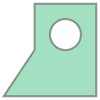

In [2]:
shape = Polygon([[-0.2, 0],
                 [0.4, 0],
                 [0.4, 0.6],
                 [0, 0.6],
                 [0, 0.3],
                 [-0.2, 0]])
shape = shape.difference(Point(0.2, 0.4).buffer(0.1, resolution=100))
shape

In [3]:
def extract_poly_coords(geom):
    if geom.type == 'Polygon':
        exterior_coords = geom.exterior.coords[:]
        interior_coords = []
        for interior in geom.interiors:
            interior_coords += interior.coords[:]
    elif geom.type == 'MultiPolygon':
        exterior_coords = []
        interior_coords = []
        for part in geom:
            epc = extract_poly_coords(part)  # Recursive call
            exterior_coords += epc['exterior_coords']
            interior_coords += epc['interior_coords']
    else:
        raise ValueError('Unhandled geometry type: ' + repr(geom.type))
    return exterior_coords, interior_coords

def get_from_shapely(shape):
    exter, inter = extract_poly_coords(shape)
    exter = np.array(exter)
    inter = np.array(inter)
    
    A = cp.area(exter)
    A -= cp.area(inter)
    
    Sy, Sz = cp.first_moment_of_area(exter)
    sy, sz = cp.first_moment_of_area(inter)
    Sy += sy
    Sz += sz
    c_y = Sz / A
    c_z = Sy / A
    
    print(A)
    print(c_y, c_z)

In [4]:
get_from_shapely(shape)

0.301414634624
0.131768894118 0.207137076236


In [5]:
np.array(shape.convex_hull.exterior.coords)

array([[-0.2,  0. ],
       [ 0. ,  0.6],
       [ 0.4,  0.6],
       [ 0.4,  0. ],
       [-0.2,  0. ]])

In [6]:
exter, inter = extract_poly_coords(shape)
exter = np.asarray(exter)
inter = np.asarray(inter)
print(cp.area(exter), cp.area(inter))

0.27 -0.0314146346236


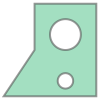

In [7]:
shape2 = shape.difference(Point(0.2, 0.1).buffer(0.05, resolution=100))
shape2

In [8]:
exter, inter = extract_poly_coords(shape2)
display(Polygon(exter).buffer(0).type)
exter = np.asarray(exter)
inter1 = np.asarray(Polygon(inter).buffer(0)[1].exterior.coords)[::-1]
inter2 = np.asarray(Polygon(inter).buffer(0)[0].exterior.coords)[::-1]
print(cp.area(exter), cp.area(inter1) + cp.area(inter2))

'Polygon'

0.27 -0.0392682932796


In [9]:
plt.plot(inter1[:,0], inter1[:,1])

<IPython.core.display.Javascript object>

In [10]:
np.pi * 0.1**2, np.pi * 0.05**2

(0.031415926535897934, 0.007853981633974483)

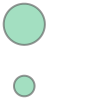

In [11]:
p = Polygon(inter).buffer(0)
p

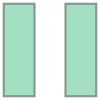

In [14]:
tmp = np.array([[0,0], [1, 0], [1, 3], [0, 3], [0,0]])
shape3 = Polygon(tmp)
tmp[:,0] += 2
shape3 = shape3.union(Polygon(tmp))
shape3